In [68]:
from src.models import Simulation, Strategy, Game
from src.games import BenoulliProcess, RandomWalkGame
from src.strategies import FixedBettingStrategy, DoubleOnLossStrategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
sim = Simulation(
    game=BenoulliProcess(p=0.5),
    strategies=[
        FixedBettingStrategy(bet_amount=100),
        DoubleOnLossStrategy(base_bet=50)
    ],
    max_bet=1000000,
    start_value=1000
)

results = sim.run(rounds=1000)

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)
/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


Last game record: Series([], dtype: object)
Last game record: outcome          1.0
bet             50.0
total_gain    1050.0
Name: 0, dtype: float64
Last game record: outcome         -1.0
bet             50.0
total_gain    1000.0
Name: 1, dtype: float64
Last game record: outcome          1.0
bet            100.0
total_gain    1100.0
Name: 2, dtype: float64
Last game record: outcome         -1.0
bet             50.0
total_gain    1050.0
Name: 3, dtype: float64
Last game record: outcome        -1.0
bet           100.0
total_gain    950.0
Name: 4, dtype: float64
Last game record: outcome          1.0
bet            200.0
total_gain    1150.0
Name: 5, dtype: float64
Last game record: outcome         -1.0
bet             50.0
total_gain    1100.0
Name: 6, dtype: float64
Last game record: outcome         -1.0
bet            100.0
total_gain    1000.0
Name: 7, dtype: float64
Last game record: outcome          1.0
bet            200.0
total_gain    1200.0
Name: 8, dtype: float64
Last game reco

In [70]:
results["Fixed Bet Strategy"].compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(-1600.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(5100.0)}

In [71]:
result1 = results["Fixed Bet Strategy"]
result2 = results["Double On Loss Strategy"]

In [72]:
result1.history.describe()

,outcome,bet,total_gain
count,1000.000000,1000.0,1000.000000
mean,-0.026000,100.0,1015.200000
std,1.000162,0.0,1126.462551
min,-1.000000,100.0,-2100.000000
25%,-1.000000,100.0,600.000000
50%,-1.000000,100.0,1200.000000
75%,1.000000,100.0,1700.000000
max,1.000000,100.0,3000.000000


In [73]:
result1.compute_statistics()

{'total_rounds': 1000,
 'final_gain': np.float64(-1600.0),
 'average_bet': np.float64(100.0),
 'max_bet': np.float64(100.0),
 'min_bet': np.float64(100.0),
 'max_drawdown': np.float64(5100.0)}

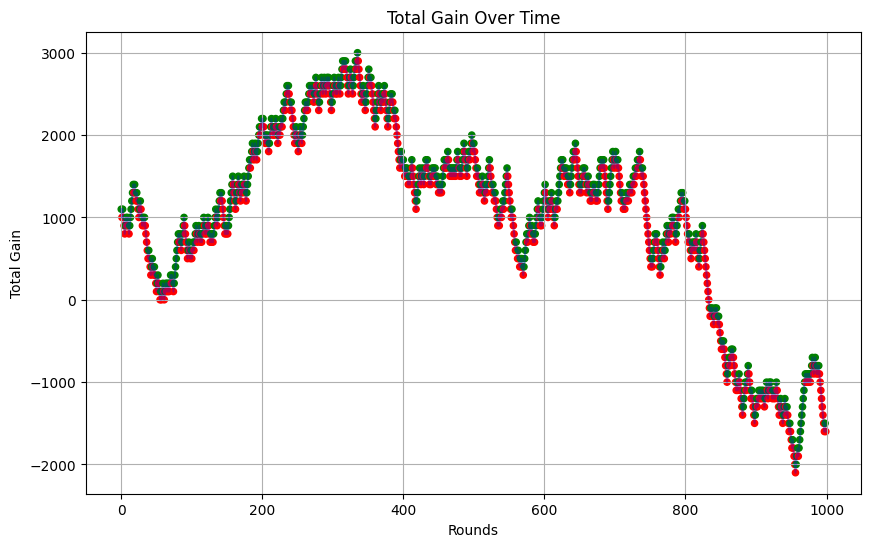

In [74]:
result1.plot_gain_over_time()

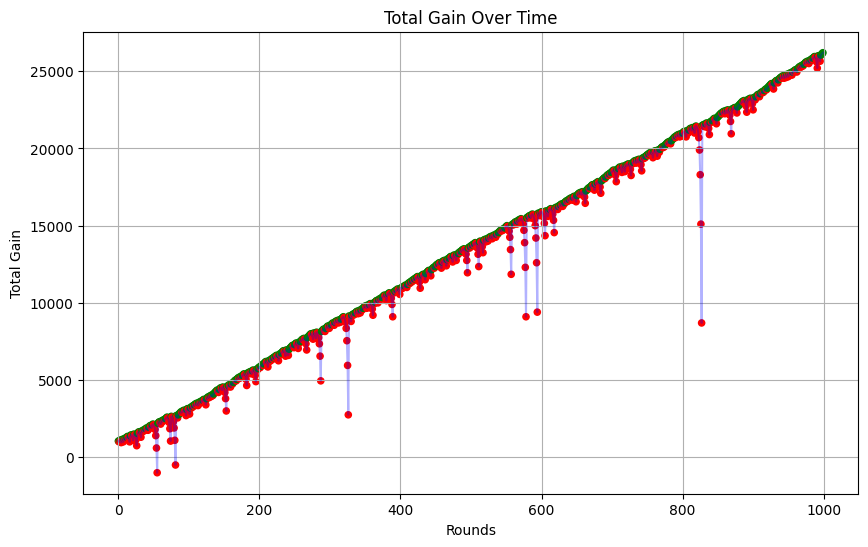

In [75]:
result2.plot_gain_over_time()

In [76]:
random_walk_game = RandomWalkGame(a=-5, b=5, p=0.5)
sim_rw = Simulation(
    game=random_walk_game,
    strategies=[
        FixedBettingStrategy(bet_amount=100),
        #DoubleOnLossStrategy(base_bet=50)
    ],
    max_bet=1000000,
    start_value=1000
)

In [77]:
results_rw = sim_rw.run(rounds=5000)

/home/desire/Desktop/Martingale/src/models.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.records = pd.concat([self.records, new_record], ignore_index=True)


In [78]:
results_rw_1 = results_rw["Fixed Bet Strategy"]
#esults_rw_2 = results_rw["Double On Loss Strategy"]

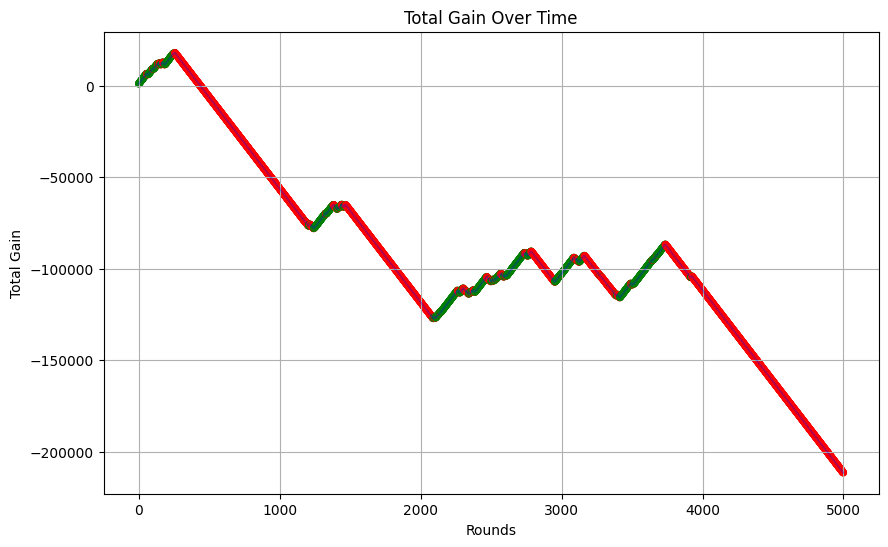

In [79]:
results_rw_1.plot_gain_over_time()

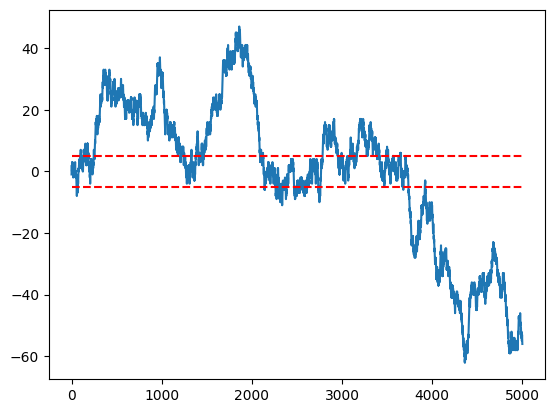

In [80]:
step_list_np = np.array(random_walk_game.step_list)

plt.plot(np.cumsum(step_list_np))
plt.hlines(5, 0, len(step_list_np), colors='r', linestyles='dashed')
plt.hlines(-5, 0, len(step_list_np), colors='r', linestyles='dashed')